In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('mortgage_default_prediction.csv')

         Loan_Amount  Interest_Rate  Credit_Score    Loan_Term      Default
count    5000.000000    5000.000000   5000.000000  5000.000000  5000.000000
mean   273574.395946       0.088978    579.226585    22.398000     0.015600
std    130335.142997       0.034274    158.293420     7.500056     0.123934
min     50005.235640       0.030006    300.138850    15.000000     0.000000
25%    159738.263005       0.059658    444.501108    15.000000     0.000000
50%    275003.881510       0.088317    581.847302    15.000000     0.000000
75%    386645.388163       0.118005    713.108066    30.000000     0.000000
max    499872.952979       0.149941    849.958655    30.000000     1.000000


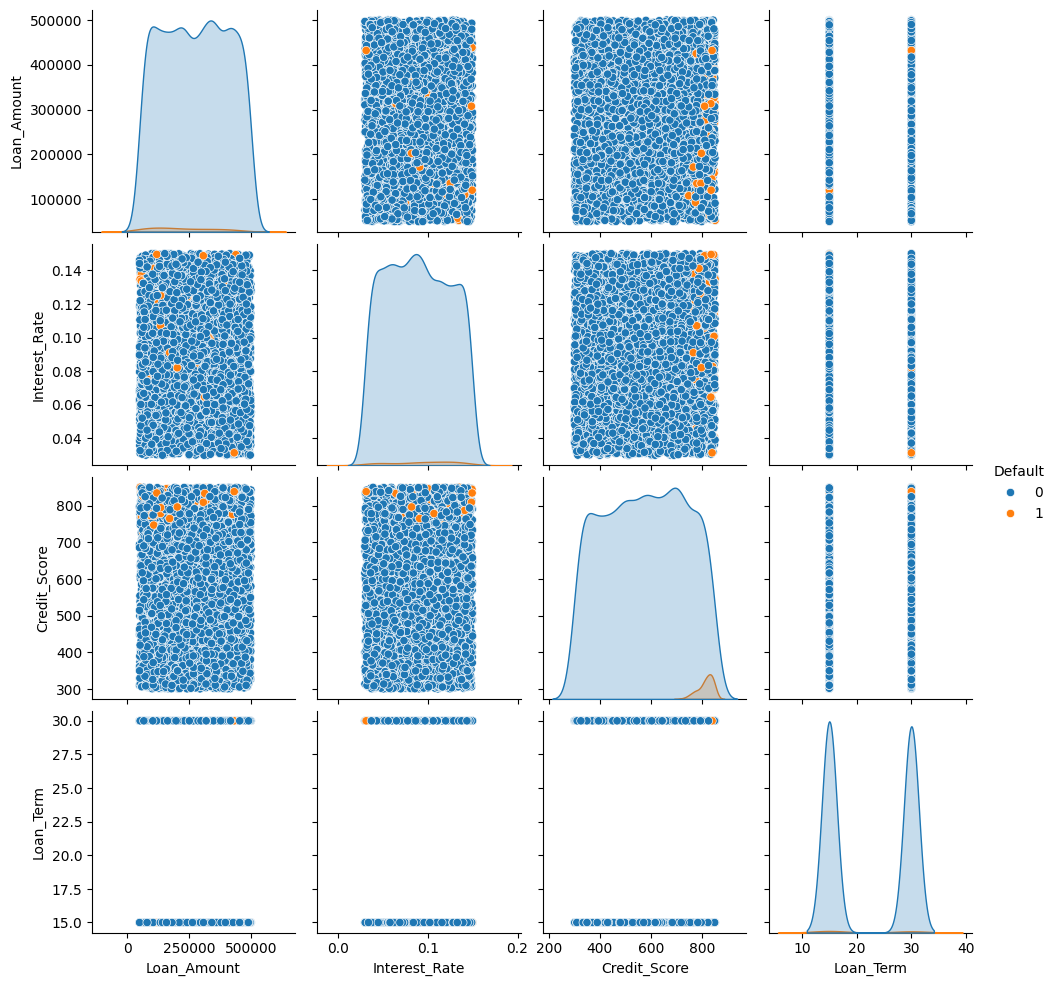

In [5]:
# EDA
print(data.describe())
sns.pairplot(data, hue='Default')
plt.show()


In [6]:
# Encode categorical variable
le = LabelEncoder()
data['Employment_Status'] = le.fit_transform(data['Employment_Status'])

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for training
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# LSTM
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 5s 16ms/step - loss: 0.2100 - accuracy: 0.9844 - val_loss: 0.0772 - val_accuracy: 0.9862
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0837 - accuracy: 0.9844 - val_loss: 0.0739 - val_accuracy: 0.9862
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9844 - val_loss: 0.0740 - val_accuracy: 0.9862
Epoch 4/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0811 - accuracy: 0.9844 - val_loss: 0.0756 - val_accuracy: 0.9862
Epoch 5/50
100/100 [==============================] - 1s 11ms/step - loss: 0.0808 - accuracy: 0.9844 - val_loss: 0.0727 - val_accuracy: 0.9862
Epoch 6/50
100/100 [==============================] - 1s 11ms/step - loss: 0.0804 - accuracy: 0.9844 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 7/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0798 - accuracy: 0.9844 - val_loss: 0.0724 - val_accuracy: 0.9862
E

In [8]:
# GRU
model_gru = Sequential([
    GRU(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    GRU(50),
    Dense(1, activation='sigmoid')
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 5s 15ms/step - loss: 0.1494 - accuracy: 0.9844 - val_loss: 0.0835 - val_accuracy: 0.9862
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0878 - accuracy: 0.9844 - val_loss: 0.0764 - val_accuracy: 0.9862
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0840 - accuracy: 0.9844 - val_loss: 0.0743 - val_accuracy: 0.9862
Epoch 4/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0834 - accuracy: 0.9844 - val_loss: 0.0738 - val_accuracy: 0.9862
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0821 - accuracy: 0.9844 - val_loss: 0.0747 - val_accuracy: 0.9862
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0818 - accuracy: 0.9844 - val_loss: 0.0733 - val_accuracy: 0.9862
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0807 - accuracy: 0.9844 - val_loss: 0.0720 - val_accuracy: 0.9862
Epoch

In [9]:
# DNN
model_dnn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.1934 - accuracy: 0.9775 - val_loss: 0.0821 - val_accuracy: 0.9862
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9844 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9844 - val_loss: 0.0664 - val_accuracy: 0.9862
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9844 - val_loss: 0.0618 - val_accuracy: 0.9862
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9844 - val_loss: 0.0594 - val_accuracy: 0.9862
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9844 - val_loss: 0.0557 - val_accuracy: 0.9862
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9844 - val_loss: 0.0566 - val_accuracy: 0.9862
Epoch 

In [10]:
# Evaluate models
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test)
loss_gru, acc_gru = model_gru.evaluate(X_test, y_test)
loss_dnn, acc_dnn = model_dnn.evaluate(X_test, y_test)

print(f'LSTM - Loss: {loss_lstm}, Accuracy: {acc_lstm}')
print(f'GRU - Loss: {loss_gru}, Accuracy: {acc_gru}')
print(f'DNN - Loss: {loss_dnn}, Accuracy: {acc_dnn}')

# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_dnn = model_dnn.predict(X_test)


32/32 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9830
LSTM - Loss: 0.05953725799918175, Accuracy: 0.9829999804496765
GRU - Loss: 0.06405983865261078, Accuracy: 0.9829999804496765
DNN - Loss: 0.05880574509501457, Accuracy: 0.9829999804496765
32/32 [==============================] - 0s 1ms/step
